Link:
https://drive.google.com/file/d/1JVqwnErkAGPXYHTzHu3LzB08UZ0wlcWJ/view?usp=sharing

# Glance at Dataset

In [ ]:
import pandas as pd
import numpy as np
#import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import alpha
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

In [ ]:
#df = pd.read_csv("/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
raw_data = pd.read_csv("/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv",
                 error_bad_lines=False)
pd.set_option('display.max_columns', None)
df = raw_data

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
df.shape 

(65276, 25)

# Data Cleaning

In [ ]:
# Age_group__at_arrest_
# Check all possible values of this variable
print(df['Age_group__at_arrest_'].unique())
# Merge the same group with different names
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].str.replace('Aged 17 years and younger', 'Aged 17 years and under')
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].str.replace('Aged 65 years and older', 'Aged 65 and older')
# Remove obs when Age_group__at_arrest_ = NaN
df = df[df['Age_group__at_arrest_'].notnull()]

['Aged 35 to 44 years' 'Aged 25 to 34 years' 'Aged 45 to 54 years'
 'Aged 55 to 64 years' 'Aged 18 to 24 years' 'Aged 65 and older'
 'Aged 65 years and older' nan 'Aged 17 years and younger'
 'Aged 17 years and under']


In [ ]:
# Sex
# Check all possible values of this variable
print(df['Sex'].unique())
# Remove obs when sex = "U"
df = df[df['Sex'] != 'U']

['M' 'F' 'U']


In [ ]:
# Perceived_Race
# Check all possible values of this variable
print(df['Perceived_Race'].unique())
# Remove obs when Perceived_Race = NaN
df = df[df['Perceived_Race'].notnull()]

['White' 'Unknown or Legacy' 'Black' 'South Asian' 'Indigenous'
 'Middle-Eastern' 'Latino' 'East/Southeast Asian' nan]


In [ ]:
# Youth_at_arrest__under_18_years
# Check all possible values of this variable
print(df['Youth_at_arrest__under_18_years'].unique())
# Merge the same group with different names
df['Youth_at_arrest__under_18_years'] = df['Youth_at_arrest__under_18_years'].replace('Youth (aged 17 and younger)', 'Youth (aged 17 years and under)')

['Not a youth' 'Youth (aged 17 and younger)'
 'Youth (aged 17 years and under)']


In [ ]:
# Occurrence_Category
# Check all possible values of this variable
print(df['Occurrence_Category'].unique())
# Remove obs when Occurrence_Category = NaN
df = df[df['Occurrence_Category'].notnull()]

['Assault & Other crimes against persons' 'Harassment/Threatening'
 'FTA/FTC/Compliance Check/Parollee' 'Assault' 'Robbery/Theft'
 'Sexual Related Crime' 'Mischief & Fraud' 'Warrant'
 'Police Category - Administrative' 'Robbery & Theft'
 'FTA/FTC, Compliance Check & Parollee' 'Drug Related' 'Weapons'
 'Vehicle Related (inc. Impaired)' 'Other Offence'
 'Harassment & Threatening' 'Weapons & Homicide' 'Break and Enter'
 'Mischief' 'Break & Enter'
 'Sexual Related Crimes & Crimes Against Children'
 'Crimes against Children' 'Police Category - Incident' 'Fraud' 'LLA'
 'Mental Health' 'Other Statute' 'Vehicle Related'
 'Other Statute & Other Incident Type' 'Impaired' 'Homicide' nan]


# Univariate EDA

It is almost always a good idea to perform univariate EDA on each of the components of a multivariate EDA before performing the multivariate EDA. 课本上说的:((

In [ ]:
print(df['Age_group__at_arrest_'].value_counts())

Aged 25 to 34 years        20899
Aged 35 to 44 years        16193
Aged 18 to 24 years        10010
Aged 45 to 54 years         9048
Aged 55 to 64 years         4576
Aged 17 years and under     3031
Aged 65 and older           1317
Name: Age_group__at_arrest_, dtype: int64


In [ ]:
print(df['Sex'].value_counts())

M    52499
F    12575
Name: Sex, dtype: int64


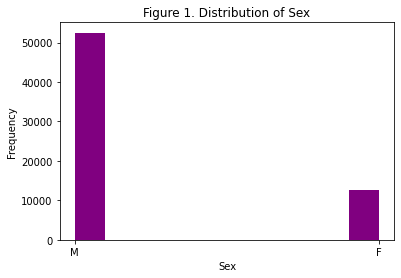

In [ ]:
# Distribution of `Sex`
plt.hist(df['Sex'], color = 'purple')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Figure 1. Distribution of Sex')
plt.show()

In [ ]:
print(df['Perceived_Race'].value_counts())

White                   27630
Black                   17487
Unknown or Legacy        5041
East/Southeast Asian     4402
South Asian              3603
Middle-Eastern           3227
Indigenous               1926
Latino                   1758
Name: Perceived_Race, dtype: int64


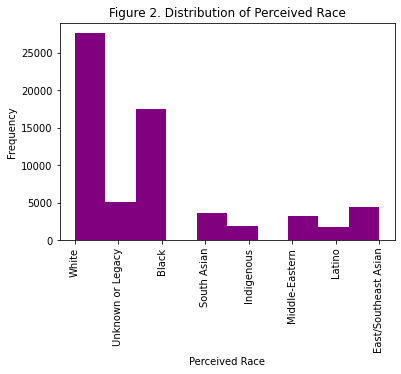

In [ ]:
# Distribution of `Perceived_Race`
plt.hist(df['Perceived_Race'], color = 'purple')
plt.xlabel('Perceived Race')
plt.ylabel('Frequency')
plt.title('Figure 2. Distribution of Perceived Race')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df['Occurrence_Category'].value_counts())

Assault                                            7724
Assault & Other crimes against persons             7234
Robbery & Theft                                    4579
Warrant                                            4376
FTA/FTC/Compliance Check/Parollee                  4244
Police Category - Administrative                   3885
FTA/FTC, Compliance Check & Parollee               3876
Robbery/Theft                                      3751
Drug Related                                       2751
Other Statute & Other Incident Type                2338
Vehicle Related (inc. Impaired)                    1977
Other Offence                                      1972
Mischief & Fraud                                   1731
Impaired                                           1362
Harassment/Threatening                             1346
Mischief                                           1321
Harassment & Threatening                           1268
Weapons                                         

# EDA - Age Group v.s. Sex

In [ ]:
# Create a contingency table of Sex vs Age Group
contingency_table = table = pd.crosstab(df['Age_group__at_arrest_'], df['Sex'])
contingency_table_total = contingency_table.copy()
contingency_table_total['Total'] = contingency_table_total['F'] + contingency_table_total['M']
contingency_table_total

Sex,F,M,Total
Age_group__at_arrest_,,,
Aged 17 years and under,732,2299,3031
Aged 18 to 24 years,2065,7945,10010
Aged 25 to 34 years,4218,16681,20899
Aged 35 to 44 years,3073,13120,16193
Aged 45 to 54 years,1601,7447,9048
Aged 55 to 64 years,676,3900,4576
Aged 65 and older,210,1107,1317


Text(0.5, 1.0, 'Figure 4. Frequency of Arrests in Different Age Groups Grouped by Sex')

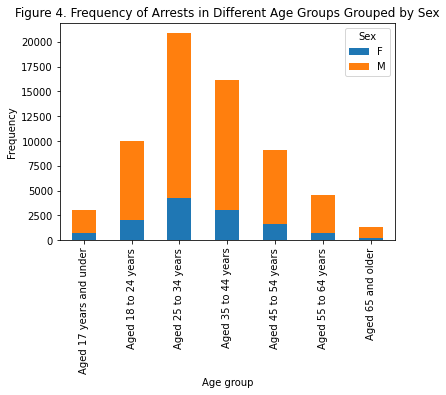

In [ ]:
# Create a stacked bar plot
ax = contingency_table.plot(kind='bar', stacked=True)
# Set the labels and title
ax.set_xlabel('Age group')
ax.set_ylabel('Frequency')
ax.set_title('Figure 4. Frequency of Arrests in Different Age Groups Grouped by Sex')

# Create New Variables - Severity of the Incident (`Score`)



In [ ]:
df['Occurrence_Category'].unique()

array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative', 'Robbery & Theft',
       'FTA/FTC, Compliance Check & Parollee', 'Drug Related', 'Weapons',
       'Vehicle Related (inc. Impaired)', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Break and Enter', 'Mischief', 'Break & Enter',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute', 'Vehicle Related',
       'Other Statute & Other Incident Type', 'Impaired', 'Homicide'],
      dtype=object)

In [ ]:
# Replace 'Break & Enter' with 'Break and Enter'
df['Occurrence_Category'] = df['Occurrence_Category'].str.replace('Break & Enter', 'Break and Enter')
# Replace 'FTA/FTC, Compliance Check & Parollee' with 'FTA/FTC/Compliance Check/Parollee'
df['Occurrence_Category'] = df['Occurrence_Category'].str.replace('FTA/FTC, Compliance Check & Parollee', 'FTA/FTC/Compliance Check/Parollee')
# Replace 'Other Statute & Other Incident Type' with 'Other Statute/Other Incident Type'
df['Occurrence_Category'] = df['Occurrence_Category'].str.replace('Other Statute & Other Incident Type', 'Other Statute/Other Incident Type')
# Replace 'Vehicle Related \(inc\. Impaired.*\)' with 'Vehicle Related'
df['Occurrence_Category'] = df['Occurrence_Category'].str.replace('Vehicle Related \(inc\. Impaired.*\)', 'Vehicle Related')

<ipython-input-113-8f9d43e879e6>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Occurrence_Category'] = df['Occurrence_Category'].str.replace('Vehicle Related \(inc\. Impaired.*\)', 'Vehicle Related')


In [ ]:
df['Occurrence_Category'].unique()

array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative', 'Robbery & Theft',
       'Drug Related', 'Weapons', 'Vehicle Related', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Break and Enter', 'Mischief',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute',
       'Other Statute/Other Incident Type', 'Impaired', 'Homicide'],
      dtype=object)

In [ ]:
# Split Occurrence_Category
df[['Occurrence_Category1', 'Occurrence_Category2']] = df['Occurrence_Category'].str.split(' & ', expand=True)
# Unique values
unique_values = pd.concat([df['Occurrence_Category1'], df['Occurrence_Category2']]).unique()
print(unique_values)

['Assault' 'Harassment/Threatening' 'FTA/FTC/Compliance Check/Parollee'
 'Robbery/Theft' 'Sexual Related Crime' 'Mischief' 'Warrant'
 'Police Category - Administrative' 'Robbery' 'Drug Related' 'Weapons'
 'Vehicle Related' 'Other Offence' 'Harassment' 'Break and Enter'
 'Sexual Related Crimes' 'Crimes against Children'
 'Police Category - Incident' 'Fraud' 'LLA' 'Mental Health'
 'Other Statute' 'Other Statute/Other Incident Type' 'Impaired' 'Homicide'
 'Other crimes against persons' None 'Theft' 'Threatening'
 'Crimes Against Children']


In [ ]:
category_scores = {
    'Assault': 10,
    'Harassment/Threatening': 10,
    'FTA/FTC/Compliance Check/Parollee': 5,
    'Robbery/Theft': 15,
    'Sexual Related Crime': 15,
    'Mischief':10,
    'Warrant': 5,
    'Police Category - Administrative': 5,
    'Robbery': 15,
    'Drug Related': 5,
    'Weapons': 15,
    'Vehicle Related': 10,
    'Other Offence': 5,
    'Harassment': 5,
    'Break and Enter': 15,
    'Sexual Related Crimes': 15,
    'Crimes against Children': 15,
    'Police Category - Incident': 10,
    'Fraud': 5,
    'LLA': 5,
    'Mental Health': 5,
    'Other Statute': 5,
    'Other Statute/Other Incident Type':5,
    'Impaired': 10,
    'Homicide': 25,
    'Vehicle Related (inc. Impairedheft' : 10,
    'Other crimes against persons': 10,
    'Theft': 10,
    'Threatening': 10,
    'Crimes Against Children': 15
}

In [ ]:
# Define a function to calculate the total score for each row
def calculate_score(row):
    # Initialize the score to zero
    score = 0
    # Add up the scores for each category
    if row['Occurrence_Category1'] in category_scores:
        score += category_scores[row['Occurrence_Category1']]
    if row['Occurrence_Category2'] in category_scores:
        score += category_scores[row['Occurrence_Category2']]
    # Return the total score
    return score

# Apply the score calculation function to the dataframe
df['Score'] = df.apply(calculate_score, axis=1)
df.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Occurrence_Category1,Occurrence_Category2,Score
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,Assault,Other crimes against persons,20
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,Assault,Other crimes against persons,20
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3,Assault,Other crimes against persons,20
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,Harassment/Threatening,None,10
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5,FTA/FTC/Compliance Check/Parollee,None,5


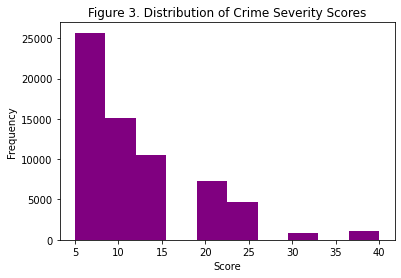

In [ ]:
# Distribution of `Score`
plt.hist(df['Score'], color = 'purple')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Figure 3. Distribution of Crime Severity Scores')
plt.show()

# EDA - Youth v.s. Sex

In [ ]:
# Create a contingency table of Sex vs Youth_at_arrest
contingency_table = table = pd.crosstab(df['Youth_at_arrest__under_18_years'], df['Sex'])
contingency_table_total = contingency_table.copy()
contingency_table_total['Total'] = contingency_table_total['F'] + contingency_table_total['M']
contingency_table_total

Sex,F,M,Total
Youth_at_arrest__under_18_years,,,
Not a youth,11843,50200,62043
Youth (aged 17 years and under),732,2299,3031


Text(0.5, 1.0, 'Frequency of Male and Female in Whether or Not The Arrestee Were Youth')

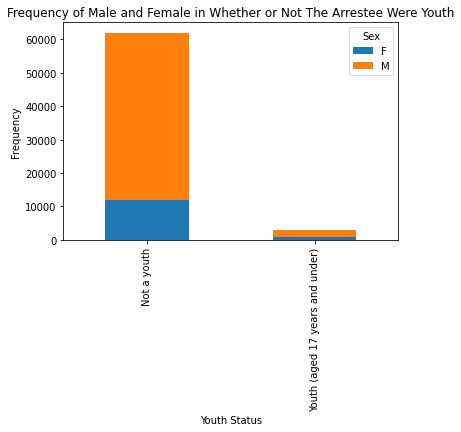

In [ ]:
# Create a stacked bar plot
ax = contingency_table.plot(kind='bar', stacked=True)
# Set the labels and title
ax.set_xlabel('Youth Status')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Male and Female in Whether or Not The Arrestee Were Youth')

# EDA - Youth v.s. Incident Severity

In [ ]:
# Group by `Youth_at_arrest__under_18_years` and calculate the quantiles
quantiles = df.groupby('Youth_at_arrest__under_18_years')['Score'].quantile([0.25, 0.5, 0.75]).unstack()
quantiles.columns = ['Q1', 'Q2', 'Q3']
quantiles.index.name = 'Youth or not'
print(quantiles)

                                  Q1    Q2    Q3
Youth or not                                    
Not a youth                      5.0  10.0  15.0
Youth (aged 17 years and under)  5.0  15.0  25.0


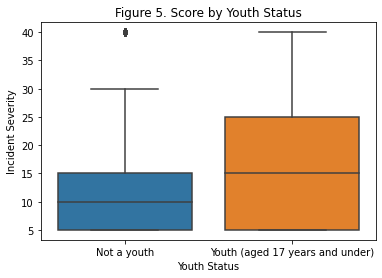

In [ ]:
# Create a boxplot
sns.boxplot(x='Youth_at_arrest__under_18_years', y='Score', data=df)
# Add axis labels and title
plt.xlabel('Youth Status')
plt.ylabel('Incident Severity')
plt.title('Figure 5. Score by Youth Status')
# Show the plot
plt.show()

# EDA - Sex v.s. Incident Severity


In [ ]:
# Group by `Sex` and calculate the incident severity score
quantiles = df.groupby('Sex')['Score'].quantile([0.25, 0.5, 0.75]).unstack()
quantiles.columns = ['Q1', 'Q2', 'Q3']
quantiles.index.name = 'Sex'
print(quantiles)

      Q1    Q2    Q3
Sex                 
F    5.0  10.0  15.0
M    5.0  10.0  15.0


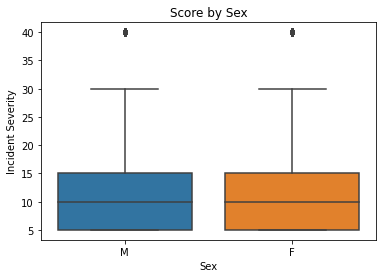

In [ ]:
# Create a boxplot
sns.boxplot(x='Sex', y='Score', data=df)
# Add axis labels and title
plt.xlabel('Sex')
plt.ylabel('Incident Severity')
plt.title('Score by Sex')
# Show the plot
plt.show()

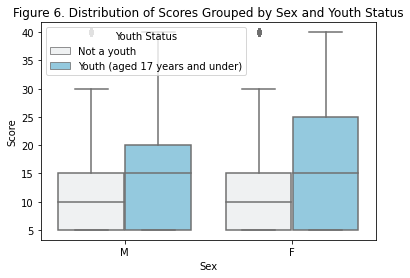

In [ ]:
# Create a boxplot to show the distribution of `Score` grouped by Sex and Youth Status
sns.boxplot(x='Sex', y='Score', hue='Youth_at_arrest__under_18_years', data=df,color='skyblue' )
# Change the title of the legend
plt.legend(title='Youth Status', loc = 'upper left')
# Add title
plt.title('Figure 6. Distribution of Scores Grouped by Sex and Youth Status')
# Show the plot
plt.show()

# Check for Assumptions

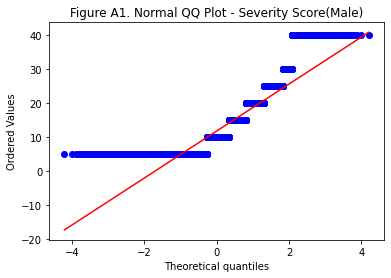

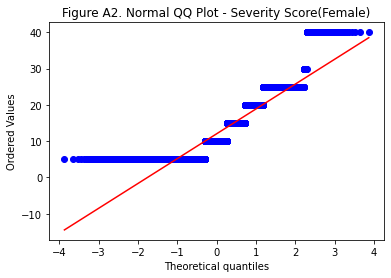

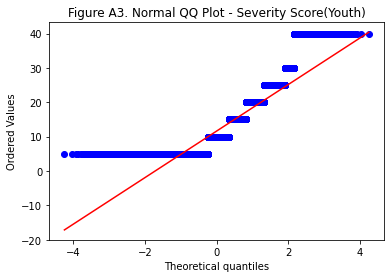

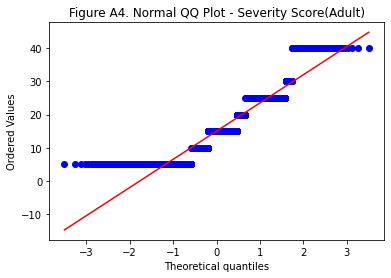

<Figure size 432x288 with 0 Axes>

In [ ]:
# Split the data
Male_score = df.loc[df['Sex'] == 'M', 'Score']
Female_score = df.loc[df['Sex'] == 'F', 'Score']
Not_youth_score = df.loc[df['Youth_at_arrest__under_18_years'] == 'Not a youth', 'Score']
Youth_score = df.loc[df['Youth_at_arrest__under_18_years'] != 'Not a youth', 'Score']
# Check for Normality - Normal QQ Plot
stats.probplot(Male_score, dist='norm', plot=plt)
plt.title('Figure A1. Normal QQ Plot - Severity Score(Male)')
plt.show()
plt.savefig('A1.png')
stats.probplot(Female_score, dist='norm', plot=plt)
plt.title('Figure A2. Normal QQ Plot - Severity Score(Female)')
plt.show()
plt.savefig('A2.png')
stats.probplot(Not_youth_score, dist='norm', plot=plt)
plt.title('Figure A3. Normal QQ Plot - Severity Score(Youth)')
plt.show()
plt.savefig('A3.png')
stats.probplot(Youth_score, dist='norm', plot=plt)
plt.title('Figure A4. Normal QQ Plot - Severity Score(Adult)')
plt.show()
plt.savefig('A4.png')


In [ ]:
# Perform the Shapiro-Wilk test for normality
stat_M, p_M = stats.shapiro(Male_score)
stat_F, p_F = stats.shapiro(Female_score)
stat_NY, p_NY = stats.shapiro(Not_youth_score)
stat_Y, p_Y = stats.shapiro(Youth_score)
print("Test statistic(Male):", stat_M)
print("p-value(Male):", p_M)
print("Test statistic(Female):", stat_F)
print("p-value(Female):", p_F)
print("Test statistic(NotYouth):", stat_NY)
print("p-value(NotYouth):", p_NY)
print("Test statistic(Youth):", stat_Y)
print("p-value(Youth):", p_Y)

Test statistic(Male): 0.814173698425293
p-value(Male): 0.0
Test statistic(Female): 0.835439920425415
p-value(Female): 0.0
Test statistic(NotYouth): 0.81630539894104
p-value(NotYouth): 0.0
Test statistic(Youth): 0.8749144673347473
p-value(Youth): 4.203895392974451e-44


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5, 1.0, 'Figure A5. Variance of Score Grouped by Sex and Youth Status')

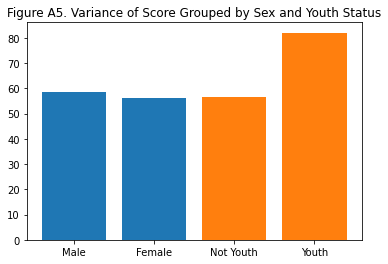

In [ ]:
# Check for Varaince
# Create a bar chart of the variances for each group
variances = [np.var(Male_score), np.var(Female_score)]
labels = ['Male', 'Female']
plt.bar(labels, variances)

variances = [np.var(Not_youth_score), np.var(Youth_score)]
labels = ['Not Youth', 'Youth']
plt.bar(labels, variances)
plt.title('Figure A5. Variance of Score Grouped by Sex and Youth Status')

# Welch's Tests & 95% CI(Sex/Race/Youth Status v.s. Score)

In [ ]:
# Welch's t-test Sex & Score
Male_score = df.loc[df['Sex'] == 'M', 'Score']
Female_score = df.loc[df['Sex'] == 'F', 'Score']
print(ttest_ind(Male_score, Female_score, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(Male_score)+len(Female_score)-2, 
                      loc=np.mean(Male_score)-np.mean(Female_score), 
                      scale=np.sqrt(stats.sem(Male_score)**2 + stats.sem(Female_score)**2))
print(ci)

# Welch's t-test Race(Indigenous v.s. others) & Score
Ind_score = df.loc[df['Perceived_Race'] == 'Indigenous', 'Score']
non_Ind_score = df.loc[df['Perceived_Race'] != 'Indigenous', 'Score']
print(ttest_ind(Ind_score, non_Ind_score, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(Ind_score)+len(non_Ind_score)-2, 
                      loc=np.mean(Ind_score)-np.mean(non_Ind_score), 
                      scale=np.sqrt(stats.sem(Ind_score)**2 + stats.sem(non_Ind_score)**2))
print(ci)


# Welch's t-test Race(Black v.s. others) & Score
Black_score = df.loc[df['Perceived_Race'] == 'Black', 'Score']
non_Black_score = df.loc[df['Perceived_Race'] != 'Black', 'Score']
print(ttest_ind(Black_score, non_Black_score, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(Black_score)+len(non_Black_score)-2, 
                      loc=np.mean(Black_score)-np.mean(non_Black_score), 
                      scale=np.sqrt(stats.sem(Black_score)**2 + stats.sem(non_Black_score)**2))
print(ci)


# Welch's t-test Race(White v.s. others) & Score
White_score = df.loc[df['Perceived_Race'] == 'White', 'Score']
non_White_score = df.loc[df['Perceived_Race'] != 'White', 'Score']
print(ttest_ind(White_score, non_White_score, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(White_score)+len(non_White_score)-2, 
                      loc=np.mean(White_score)-np.mean(non_White_score), 
                      scale=np.sqrt(stats.sem(White_score)**2 + stats.sem(non_White_score)**2))
print(ci)


# Welch's t-test Youth & Score
Not_youth_score = df.loc[df['Youth_at_arrest__under_18_years'] == 'Not a youth', 'Score']
Youth_score = df.loc[df['Youth_at_arrest__under_18_years'] != 'Not a youth', 'Score']
print(ttest_ind(Not_youth_score, Youth_score, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(Not_youth_score)+len(Youth_score)-2, 
                      loc=np.mean(Not_youth_score)-np.mean(Youth_score), 
                      scale=np.sqrt(stats.sem(Not_youth_score)**2 + stats.sem(Youth_score)**2))
print(ci)



# Welch's t-test Age & Score
Y25_score = df.loc[df['Age_group__at_arrest_'] == 'Aged 25 to 34 years', 'Score']
non_Y25_score = df.loc[df['Age_group__at_arrest_'] != 'Aged 25 to 34 years', 'Score']
print(ttest_ind(Y25_score, non_Y25_score, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(Y25_score)+len(non_Y25_score)-2, 
                      loc=np.mean(Y25_score)-np.mean(non_Y25_score), 
                      scale=np.sqrt(stats.sem(Y25_score)**2 + stats.sem(non_Y25_score)**2))
print(ci)


Ttest_indResult(statistic=-4.201193766995418, pvalue=2.666993724887672e-05)
(-0.45998599435687315, -0.16732430525803885)
Ttest_indResult(statistic=-3.051392846178105, pvalue=0.0023070647681573985)
(-0.8707672902882941, -0.18963764217154866)
Ttest_indResult(statistic=3.166585660216738, pvalue=0.0015440126151219954)
(0.0850737253733049, 0.36146454578385434)
Ttest_indResult(statistic=-7.872343579259532, pvalue=3.537395379678271e-15)
(-0.5895451210682428, -0.3545027557795226)
Ttest_indResult(statistic=-20.344055533641278, pvalue=1.1072629175990215e-86)
(-3.7309157897398473, -3.0751967938248574)
Ttest_indResult(statistic=-9.577970852894254, pvalue=1.0407533678557168e-21)
(-0.7265270935897593, -0.47969107922528276)


# ANOVA (Score ~ Youth, Sex)

In [ ]:
# Fit two-way ANOVA model with interaction
model1 = ols('Score ~ Youth_at_arrest__under_18_years * Sex', df).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)
# Print ANOVA table
print(anova_table1)

                                           sum_sq       df           F  \
Youth_at_arrest__under_18_years      3.317910e+04      1.0  575.986755   
Sex                                  7.107211e+02      1.0   12.338066   
Youth_at_arrest__under_18_years:Sex  1.063469e+01      1.0    0.184617   
Residual                             3.748288e+06  65070.0         NaN   

                                            PR(>F)  
Youth_at_arrest__under_18_years      9.983440e-127  
Sex                                   4.441153e-04  
Youth_at_arrest__under_18_years:Sex   6.674362e-01  
Residual                                       NaN  


In [ ]:
# Fit two-way ANOVA model with interaction
model1 = ols('Score ~ C(Youth_at_arrest__under_18_years) + C(Sex) + C(Youth_at_arrest__under_18_years):C(Sex)', df).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)
# Print ANOVA table
print(anova_table1)

                                                 sum_sq       df           F  \
C(Youth_at_arrest__under_18_years)         3.317910e+04      1.0  575.986755   
C(Sex)                                     7.107211e+02      1.0   12.338066   
C(Youth_at_arrest__under_18_years):C(Sex)  1.063469e+01      1.0    0.184617   
Residual                                   3.748288e+06  65070.0         NaN   

                                                  PR(>F)  
C(Youth_at_arrest__under_18_years)         9.983440e-127  
C(Sex)                                      4.441153e-04  
C(Youth_at_arrest__under_18_years):C(Sex)   6.674362e-01  
Residual                                             NaN  


In [ ]:
# Fit two-way ANOVA model without interaction
model2 = ols('Score ~ Youth_at_arrest__under_18_years + Sex', df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
# Print ANOVA table
print(anova_table2)

                                       sum_sq       df           F  \
Youth_at_arrest__under_18_years  3.317910e+04      1.0  575.993972   
Sex                              7.107211e+02      1.0   12.338221   
Residual                         3.748298e+06  65071.0         NaN   

                                        PR(>F)  
Youth_at_arrest__under_18_years  9.947537e-127  
Sex                               4.440785e-04  
Residual                                   NaN  


In [ ]:
# Fit two-way ANOVA model with interaction, unbalanced design
anova_table1_unbal = sm.stats.anova_lm(model1, typ=3)
# Print ANOVA table
print(anova_table1_unbal)

                                                 sum_sq       df  \
Intercept                                  1.655459e+06      1.0   
C(Youth_at_arrest__under_18_years)         8.435474e+03      1.0   
C(Sex)                                     6.328167e+02      1.0   
C(Youth_at_arrest__under_18_years):C(Sex)  1.063469e+01      1.0   
Residual                                   3.748288e+06  65070.0   

                                                      F        PR(>F)  
Intercept                                  28738.647002  0.000000e+00  
C(Youth_at_arrest__under_18_years)           146.439218  1.131194e-33  
C(Sex)                                        10.985652  9.187012e-04  
C(Youth_at_arrest__under_18_years):C(Sex)      0.184617  6.674362e-01  
Residual                                            NaN           NaN  


In [ ]:
# Fit two-way ANOVA model without interaction, unbalanced design
anova_table2_unbal = sm.stats.anova_lm(model2, typ=3)
# Print ANOVA table
print(anova_table2_unbal)

                                       sum_sq       df             F  \
Intercept                        1.734069e+06      1.0  30103.696831   
Youth_at_arrest__under_18_years  3.317910e+04      1.0    575.993972   
Sex                              7.107211e+02      1.0     12.338221   
Residual                         3.748298e+06  65071.0           NaN   

                                        PR(>F)  
Intercept                         0.000000e+00  
Youth_at_arrest__under_18_years  9.947537e-127  
Sex                               4.440785e-04  
Residual                                   NaN  


In [ ]:
ss_factor1 = anova_table2_unbal['sum_sq']['Youth_at_arrest__under_18_years']
ss_factor2 = anova_table2_unbal['sum_sq']['Sex']
ss_error = anova_table2_unbal['sum_sq']['Residual']
ss_total = ss_factor1 + ss_factor2 + ss_error
eta_squared_factor1 = ss_factor1 / ss_total
eta_squared_factor2 = ss_factor2 / ss_total
print(eta_squared_factor1)
print(eta_squared_factor2)

0.008772461626630167
0.00018791267271973673


# Post-Hoc(Tukey's HSD)

In [ ]:
tukey_result1 = pairwise_tukeyhsd(df['Score'], df['Youth_at_arrest__under_18_years'])
tukey_result2 = pairwise_tukeyhsd(df['Score'], df['Sex'])
tukey_result_interaction = pairwise_tukeyhsd(df['Score'], df['Youth_at_arrest__under_18_years'] + ' x ' + df['Sex'])

# Print results
print(tukey_result1)
print(tukey_result2)
print(tukey_result_interaction)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
   group1                group2             meandiff p-adj lower  upper  reject
-------------------------------------------------------------------------------
Not a youth Youth (aged 17 years and under)   3.4031 0.001 3.1263 3.6798   True
-------------------------------------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     F      M  -0.3137 0.001 -0.462 -0.1653   True
--------------------------------------------------
                             Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
               group1                              group2               meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------
           

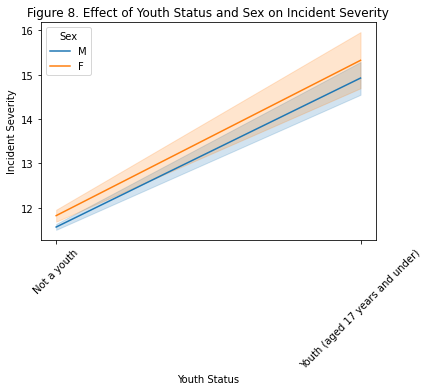

In [ ]:
# create an interaction plot
sns.lineplot(x='Youth_at_arrest__under_18_years', y='Score', hue='Sex', data=df)
# set plot title
plt.title('Figure 8. Effect of Youth Status and Sex on Incident Severity')
# Edit the legend
plt.legend(title='Sex', loc = 'upper left')
plt.xticks(rotation=45)
plt.xlabel('Youth Status')
plt.ylabel('Incident Severity')
# show the plot
plt.show()

# EDA - Strip Search v.s. Sex


In [ ]:
# Create a contingency table of Strip Search vs Sex
contingency_table = pd.crosstab(df['Sex'], df['StripSearch'])
contingency_table['Proportion'] = contingency_table[1.0]/(contingency_table[1.0] + contingency_table[0.0])
contingency_table.sort_values('Proportion', ascending=False)

StripSearch,0,1,Proportion
Sex,,,
M,45983,6516,0.124117
F,11292,1283,0.102028


# EDA - Strip Search v.s. Race

In [ ]:
# Create a contingency table of Strip Search vs Race
contingency_table = pd.crosstab(df['Perceived_Race'], df['StripSearch'])
contingency_table['Total Number of Arrests'] = contingency_table[1.0] + contingency_table[0.0]
contingency_table['Strip_Searched_Prop'] = contingency_table[1.0]/(contingency_table[1.0] + contingency_table[0.0])
contingency_table.sort_values('Strip_Searched_Prop', ascending=False)

StripSearch,0,1,Total Number of Arrests,Strip_Searched_Prop
Perceived_Race,,,,
Indigenous,1620,306,1926,0.158879
Black,15053,2434,17487,0.139189
White,24064,3566,27630,0.129063
Unknown or Legacy,4506,535,5041,0.106130
East/Southeast Asian,4061,341,4402,0.077465
Latino,1626,132,1758,0.075085
South Asian,3346,257,3603,0.071329
Middle-Eastern,2999,228,3227,0.070654


# EDA - Count the Number of Arrests and Strip Searches Grouped by PersonID, Race, and Sex

In [ ]:
# Group the data by person ID, sex, and race and count the number of strip searches and arrests
arrest_counts = df.groupby(['PersonID', 'Sex', 'Perceived_Race']).size().reset_index(name='Num_of_Arrests')
strip_search_counts = df[df['StripSearch'] == 1].groupby(['PersonID', 'Sex', 'Perceived_Race']).size().reset_index(name='Num_of_Strip_Searches')
# Merge the two tables on person ID, sex, and race
merged_counts = pd.merge(arrest_counts, strip_search_counts, on=['PersonID', 'Sex', 'Perceived_Race'], how='left')
# Replace any missing values with 0
merged_counts.fillna(0, inplace=True)
merged_counts['Strip_Searched_Prop'] = merged_counts['Num_of_Strip_Searches']/merged_counts['Num_of_Arrests']
# sort in descending order
merged_counts.sort_values('Num_of_Arrests', ascending=False)

,PersonID,Sex,Perceived_Race,Num_of_Arrests,Num_of_Strip_Searches,Strip_Searched_Prop
29676,327486,M,White,53,2.0,0.037736
33782,331300,M,Black,41,8.0,0.195122
4201,303892,M,Indigenous,37,13.0,0.351351
32700,330299,M,Black,35,10.0,0.285714
11232,310375,M,Indigenous,33,7.0,0.212121
...,...,...,...,...,...,...
15382,314235,M,White,1,0.0,0.000000
15381,314234,M,Black,1,0.0,0.000000
15380,314233,M,White,1,0.0,0.000000
15379,314232,F,White,1,0.0,0.000000


# Welch's t-tests & 95% CI(Sex/Race v.s. Number of Strip Searches)

In [ ]:
# Welch's t-test sex (Male v.s. Female) & Num_of_Strip_Searches
Male_number_of_strip_searches = merged_counts.loc[merged_counts['Sex'] == 'M', 'Num_of_Strip_Searches']
Female_number_of_strip_searches = merged_counts.loc[merged_counts['Sex'] == 'F', 'Num_of_Strip_Searches']
print(ttest_ind(Male_number_of_strip_searches, Female_number_of_strip_searches, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(Male_number_of_strip_searches)+len(Female_number_of_strip_searches)-2, 
                      loc=np.mean(Male_number_of_strip_searches)-np.mean(Female_number_of_strip_searches), 
                      scale=np.sqrt(stats.sem(Male_number_of_strip_searches)**2 + stats.sem(Female_number_of_strip_searches)**2))
print(ci)

# Welch's t-test Race(Indigenous v.s. others) & Num_of_Strip_Searches
Ind_number_of_strip_searches = merged_counts.loc[merged_counts['Perceived_Race'] == 'Indigenous', 'Num_of_Strip_Searches']
non_Ind_number_of_strip_searches = merged_counts.loc[merged_counts['Perceived_Race'] != 'Indigenous', 'Num_of_Strip_Searches']
print(ttest_ind(Ind_number_of_strip_searches, non_Ind_number_of_strip_searches, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(Ind_number_of_strip_searches)+len(non_Ind_number_of_strip_searches)-2, 
                      loc=np.mean(Ind_number_of_strip_searches)-np.mean(non_Ind_number_of_strip_searches), 
                      scale=np.sqrt(stats.sem(Ind_number_of_strip_searches)**2 + stats.sem(non_Ind_number_of_strip_searches)**2))
print(ci)

# Welch's t-test Race(Black v.s. others) & Num_of_Strip_Searches
Black_number_of_strip_searches = merged_counts.loc[merged_counts['Perceived_Race'] == 'Black', 'Num_of_Strip_Searches']
non_Black_number_of_strip_searches = merged_counts.loc[merged_counts['Perceived_Race'] != 'Black', 'Num_of_Strip_Searches']
print(ttest_ind(Black_number_of_strip_searches, non_Black_number_of_strip_searches, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(Black_number_of_strip_searches)+len(non_Black_number_of_strip_searches)-2, 
                      loc=np.mean(Black_number_of_strip_searches)-np.mean(non_Black_number_of_strip_searches), 
                      scale=np.sqrt(stats.sem(Black_number_of_strip_searches)**2 + stats.sem(non_Black_number_of_strip_searches)**2))
print(ci)

# Welch's t-test Race(White v.s. others) & Num_of_Strip_Searches
White_number_of_strip_searches = merged_counts.loc[merged_counts['Perceived_Race'] == 'White', 'Num_of_Strip_Searches']
non_White_number_of_strip_searches = merged_counts.loc[merged_counts['Perceived_Race'] != 'White', 'Num_of_Strip_Searches']
print(ttest_ind(White_number_of_strip_searches, non_White_number_of_strip_searches, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(White_number_of_strip_searches)+len(non_White_number_of_strip_searches)-2, 
                      loc=np.mean(White_number_of_strip_searches)-np.mean(non_White_number_of_strip_searches), 
                      scale=np.sqrt(stats.sem(White_number_of_strip_searches)**2 + stats.sem(non_White_number_of_strip_searches)**2))
print(ci)

Ttest_indResult(statistic=6.363900944554992, pvalue=2.0277105670420192e-10)
(0.0316907683591781, 0.05989982809668838)
Ttest_indResult(statistic=5.396737166542, pvalue=8.867413873048523e-08)
(0.11826023555506546, 0.2531523113023786)
Ttest_indResult(statistic=7.776796120942398, pvalue=7.89264712754751e-15)
(0.04463440556290163, 0.07471446910704779)
Ttest_indResult(statistic=10.046592474402555, pvalue=1.0530363056374892e-23)
(0.05595821684381892, 0.08308452348828187)


# Welch's t-tests(Sex/Race v.s. Number of Arrests)

In [ ]:
# Welch's t-test sex (Male v.s. Female) & Num_of_Arrests
Male_number_of_arrest = merged_counts.loc[merged_counts['Sex'] == 'M', 'Num_of_Arrests']
Female_number_of_arrest = merged_counts.loc[merged_counts['Sex'] == 'F', 'Num_of_Arrests']
print(ttest_ind(Male_number_of_arrest, Female_number_of_arrest, equal_var=False))

# Welch's t-test Race(Indigenous v.s. others) & Num_of_Arrests
Ind_number_of_arrest = merged_counts.loc[merged_counts['Perceived_Race'] == 'Indigenous', 'Num_of_Arrests']
non_Ind_number_of_arrest = merged_counts.loc[merged_counts['Perceived_Race'] != 'Indigenous', 'Num_of_Arrests']
print(ttest_ind(Ind_number_of_arrest, non_Ind_number_of_arrest, equal_var=False))

# Welch's t-test Race(Black v.s. others) & Num_of_Arrests
Black_number_of_arrest = merged_counts.loc[merged_counts['Perceived_Race'] == 'Black', 'Num_of_Arrests']
non_Black_number_of_arrest = merged_counts.loc[merged_counts['Perceived_Race'] != 'Black', 'Num_of_Arrests']
print(ttest_ind(Black_number_of_arrest, non_Black_number_of_arrest, equal_var=False))

# Welch's t-test Race(White v.s. others) & Num_of_Arrests
White_number_of_arrest = merged_counts.loc[merged_counts['Perceived_Race'] == 'White', 'Num_of_Arrests']
non_White_number_of_arrest = merged_counts.loc[merged_counts['Perceived_Race'] != 'White', 'Num_of_Arrests']
print(ttest_ind(White_number_of_arrest, non_White_number_of_arrest, equal_var=False))

Ttest_indResult(statistic=4.53414730091322, pvalue=5.834042423406695e-06)
Ttest_indResult(statistic=7.43220327491772, pvalue=2.6709762125596526e-13)
Ttest_indResult(statistic=6.1452559576431485, pvalue=8.164490682430143e-10)
Ttest_indResult(statistic=17.914941248665126, pvalue=2.682123480875926e-71)


# ANOVA (Number of Strip Searches ~ Race, Sex)

In [ ]:
# Fit two-way ANOVA model with interaction
model3 = ols('Num_of_Strip_Searches ~ Perceived_Race * Sex', merged_counts).fit()
anova_table3 = sm.stats.anova_lm(model3, typ=2)
# Print ANOVA table
print(anova_table3)

                          sum_sq       df          F         PR(>F)
Perceived_Race        198.842086      7.0  72.845052  2.840929e-105
Sex                    23.076030      1.0  59.176720   1.473994e-14
Perceived_Race:Sex     17.354405      7.0   6.357721   1.723438e-07
Residual            15709.962163  40287.0        NaN            NaN


In [ ]:
# Fit two-way ANOVA model with interaction, unbalanced design
anova_table3_unbal = sm.stats.anova_lm(model3, typ=3)
# Print ANOVA table
print(anova_table3_unbal)

                          sum_sq       df          F        PR(>F)
Intercept              33.920188      1.0  86.985735  1.146767e-20
Perceived_Race         35.772018      7.0  13.104945  5.705875e-17
Sex                    26.023355      1.0  66.734909  3.195420e-16
Perceived_Race:Sex     17.354405      7.0   6.357721  1.723438e-07
Residual            15709.962163  40287.0        NaN           NaN


In [ ]:
# Fit two-way ANOVA model without interaction
model4 = ols('Num_of_Strip_Searches ~ Perceived_Race + Sex', merged_counts).fit()
anova_table4 = sm.stats.anova_lm(model4, typ=2)
# Print ANOVA table
print(anova_table4)

                      sum_sq       df          F         PR(>F)
Perceived_Race    198.842086      7.0  72.777314  3.581192e-105
Sex                23.076030      1.0  59.121692   1.515727e-14
Residual        15727.316568  40294.0        NaN            NaN


In [ ]:
# Fit two-way ANOVA model without interaction, unbalanced design
anova_table4_unbal = sm.stats.anova_lm(model4, typ=3)
# Print ANOVA table
print(anova_table4_unbal)

                      sum_sq       df           F         PR(>F)
Intercept         179.230308      1.0  459.195056  2.650997e-101
Perceived_Race    198.842086      7.0   72.777314  3.581192e-105
Sex                23.076030      1.0   59.121692   1.515727e-14
Residual        15727.316568  40294.0         NaN            NaN


In [ ]:
ss_factor3 = anova_table4_unbal['sum_sq']['Perceived_Race']
ss_factor4 = anova_table4_unbal['sum_sq']['Sex']
ss_error2 = anova_table4_unbal['sum_sq']['Residual']
ss_total2 = ss_factor3 + ss_factor4 + ss_error2
eta_squared_factor3 = ss_factor3 / ss_total2
eta_squared_factor4 = ss_factor4 / ss_total2
print(eta_squared_factor3)
print(eta_squared_factor4)

0.012467186658256175
0.001446842492692184


In [ ]:
tukey_result1 = pairwise_tukeyhsd(merged_counts['Num_of_Strip_Searches'], merged_counts['Perceived_Race'])
tukey_result2 = pairwise_tukeyhsd(merged_counts['Num_of_Strip_Searches'], merged_counts['Sex'])
tukey_result_interaction = pairwise_tukeyhsd(merged_counts['Num_of_Strip_Searches'], 
                                             merged_counts['Perceived_Race'] + ' x ' + merged_counts['Sex'])

# Print results
print(tukey_result1)
print(tukey_result2)
print(tukey_result_interaction) # horrible:)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.1383  0.001 -0.1757 -0.1008   True
               Black           Indigenous   0.1374  0.001  0.0684  0.2064   True
               Black               Latino  -0.1347  0.001 -0.1909 -0.0784   True
               Black       Middle-Eastern  -0.1406  0.001  -0.184 -0.0972   True
               Black          South Asian   -0.147  0.001 -0.1873 -0.1068   True
               Black    Unknown or Legacy  -0.1154  0.001 -0.1497 -0.0812   True
               Black                White   -0.001    0.9 -0.0252  0.0233  False
East/Southeast Asian           Indigenous   0.2757  0.001  0.2018  0.3496   True
East/Southeast Asian               Latino   0.0036    0.9 -0.0585  0.0658  False
East/Southeast Asian       M

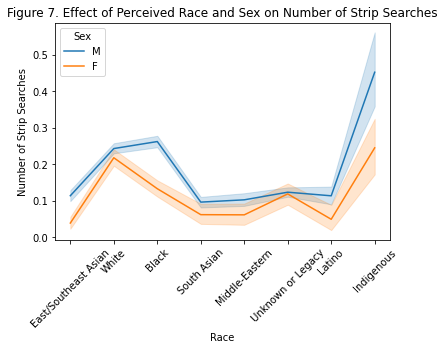

In [ ]:
# create an interaction plot
sns.lineplot(x='Perceived_Race', y='Num_of_Strip_Searches', hue='Sex', data=merged_counts)
# set plot title
plt.title('Figure 7. Effect of Perceived Race and Sex on Number of Strip Searches')
# Edit the legend
plt.legend(title='Sex', loc = 'upper left')
plt.xticks(rotation=45)
plt.xlabel('Race')
plt.ylabel('Number of Strip Searches')
# show the plot
plt.show()

# Individuals with more than 3 arrests/Outliers

(2831, 6)


(array([2.342e+03, 3.380e+02, 9.300e+01, 3.700e+01, 1.300e+01, 4.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 4. ,  8.9, 13.8, 18.7, 23.6, 28.5, 33.4, 38.3, 43.2, 48.1, 53. ]),
 <BarContainer object of 10 artists>)

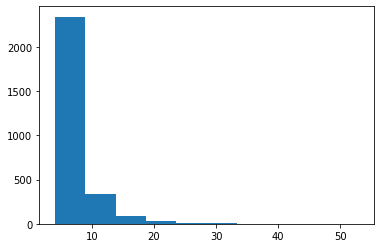

In [ ]:
# Individuals with more than 3 arrests
count_morethan3 = merged_counts[merged_counts['Num_of_Arrests'] > 3]
print(count_morethan3.shape)
plt.hist(count_morethan3['Num_of_Arrests'])

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = count_morethan3['Num_of_Arrests'].quantile(0.25)
Q3 = count_morethan3['Num_of_Arrests'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

-0.5 11.5


In [ ]:
count_morethan3

,PersonID,Sex,Perceived_Race,Num_of_Arrests,Num_of_Strip_Searches,Strip_Searched_Prop
3,300003,M,White,8,1.0,0.125000
7,300007,M,South Asian,8,1.0,0.125000
19,300019,F,White,4,0.0,0.000000
45,300043,M,White,9,2.0,0.222222
55,300053,M,White,4,1.0,0.250000
...,...,...,...,...,...,...
40260,337310,M,White,9,4.0,0.444444
40277,337325,F,White,6,0.0,0.000000
40281,337328,M,Black,5,1.0,0.200000
40283,337329,M,Black,4,0.0,0.000000


In [ ]:
# Remove outliers
remove_outliers = count_morethan3[(count_morethan3['Num_of_Arrests'] > lower_bound) | (count_morethan3['Num_of_Arrests'] < upper_bound)]
avg_number_of_arrests_by_race = remove_outliers.groupby('Perceived_Race')['Num_of_Arrests'].mean().sort_values(ascending=False)
avg_number_of_arrests_by_race

Perceived_Race
Indigenous              6.914894
White                   6.768672
Black                   6.409314
Middle-Eastern          5.806452
South Asian             5.757143
East/Southeast Asian    5.546392
Latino                  5.339623
Unknown or Legacy       4.854167
Name: Num_of_Arrests, dtype: float64

In [ ]:
# number_of_arrest > 11
outliers = count_morethan3[(count_morethan3['Num_of_Arrests'] < lower_bound) | (count_morethan3['Num_of_Arrests'] > upper_bound)]
avg_number_of_arrests_by_race = outliers.groupby('Perceived_Race')['Num_of_Arrests'].mean().sort_values(ascending=False)
avg_number_of_arrests_by_race

Perceived_Race
Indigenous              19.545455
Black                   17.112903
White                   16.458904
East/Southeast Asian    14.500000
Latino                  14.000000
South Asian             12.666667
Middle-Eastern          12.000000
Name: Num_of_Arrests, dtype: float64

In [ ]:
# Welch's t-test Sex & Score
Male_number_of_arrest = count_morethan3.loc[count_morethan3['Sex'] == 'M', 'Num_of_Arrests']
Female_number_of_arrest = count_morethan3.loc[count_morethan3['Sex'] == 'F', 'Num_of_Arrests']
print(ttest_ind(Male_number_of_arrest, Female_number_of_arrest, equal_var=False))

Ttest_indResult(statistic=-1.2369755332780836, pvalue=0.21648993226456623)


# Number of Arrests by Quarter

In [ ]:
# Combine the two columns into a new column
df = df[df['Arrest_Year'] != 1]
df['Arrest_YearQuarter'] = df.apply(lambda x: str(x['Arrest_Year']) + ' ' + str(x['Arrest_Month']), axis=1)
#category_counts = df.groupby('Arrest_YearQuarter').count()
counts = df.groupby('Arrest_YearQuarter').size().reset_index(name='Count')
counts

,Arrest_YearQuarter,Count
0,2020 Apr-June,6919
1,2020 Jan-Mar,9509
2,2020 July-Sept,8310
3,2020 Oct-Dec,7222
4,2021 Apr-June,8235
5,2021 Jan-Mar,8086
6,2021 July-Sept,8434
7,2021 Oct-Dec,8359


['2020 Apr-June' '2020 Jan-Mar' '2020 July-Sept' '2020 Oct-Dec'
 '2021 Apr-June' '2021 Jan-Mar' '2021 July-Sept' '2021 Oct-Dec']


Text(0.5, 1.0, 'Counts by Quarter')

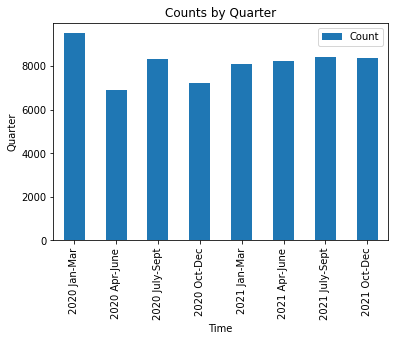

In [ ]:
print(counts['Arrest_YearQuarter'].unique())

# Define the order
order = ['2020 Jan-Mar', '2020 Apr-June', '2020 July-Sept', '2020 Oct-Dec',
         '2021 Jan-Mar', '2021 Apr-June', '2021 July-Sept', '2021 Oct-Dec']
  

# Create a categorical variable with the desired order
counts['Arrest_YearQuarter'] = pd.Categorical(counts['Arrest_YearQuarter'], categories=order, ordered=True)

# Sort the data
counts = counts.sort_values('Arrest_YearQuarter')

# Create a bar plot
counts.plot(kind='bar', x='Arrest_YearQuarter', y='Count')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Quarter')
plt.title('Counts by Quarter')
